<h1 style="text-align: center;">
    <div style="color: #808080; font-size: 60%">Data Science DISCOVERY Project #2</div>
    <div style="color: #6A4C9C"> Project2: Illini Volleyball Performance Analytics: 2024 Season</div>
    <!-- <div style="color: #A569BD;font-size: 40%"> color trying1</div>
    <div style="color: #9B59B6;font-size: 40%"> color trying1</div>
    <div style="color: #8E44AD;font-size: 40%"> color trying1</div> -->
    <div style="font-size: 60%;"><a href="https://fightingillini.com/sports/womens-volleyball/stats">https://fightingillini.com/sports/womens-volleyball/stats</a></div>

<hr style="color: #8E44AD;">

# Section 1: Dataset

These days, data science is everywhere, and it really makes a difference in our lives. As a student athlete for over 10 years, I’ve seen how important stats are in volleyball training and games. Back when I played, I always made it a point to analyze my own stats after each game or tournament. I needed that data to understand my strengths and weaknesses. My coach also had me track and analyze the stats of our opponents, and I noticed how he adjusted our strategies based on what we found.

Now, I’ve started a new adventure at UIUC! With the 2024 game season underway, I’m excited to see how the players are performing this year. I want to dig into the team’s characteristics and maybe uncover insights that coaches or players might miss during live games.

The original data can be found on the official website of fightingillini: <a href="https://fightingillini.com/sports/womens-volleyball/stats">https://fightingillini.com/sports/womens-volleyball/stats</a>. The version of the dataset I'll use for this project is here:
- 2024_Illini_volleyball_individual_performance.csv

I chose to focus on the Conference Record because teams in the same conference usually have similar skill levels. This makes the variance in conference records lower, which helps give a clearer picture of player performance.

In [1174]:
import pandas as pd
file_path = '2024_Illini_volleyball_individual_performance.csv'
df = pd.read_csv(file_path)
df

,Name,Sets Played,Matches Played,Matches Started,Points,Points per Set,Kills,Kills per Set,Errors,Attacking Total Attempts,...,Reception Errors,Reception Total Attempts,Reception Percentage,Reception Errors per Set,Block Solos,Block Assists,Total Blocks,Blocks per Set,Blocking Errors,Ball Handling Errors
0,"Reilly, Raegen",47,14,0.0,3.0,0.06,0,0.00,0,1,...,0,0,0.000,0.00,0,0,0,0.00,1,0
1,"Barry, Lily",49,14,0.0,11.0,0.22,0,0.00,0,3,...,19,173,0.890,0.39,0,0,0,0.00,0,0
2,"May, Bianca",11,4,0.0,0.0,0.00,0,0.00,0,0,...,0,0,0.000,0.00,0,0,0,0.00,0,0
3,"de Boer, Taylor",7,4,0.0,4.5,0.64,4,0.57,4,21,...,0,0,0.000,0.00,0,1,1,0.14,0,0
4,"Hernandez, Averie",49,14,14.0,143.5,2.93,127,2.59,44,410,...,29,302,0.904,0.59,0,15,15,0.31,0,1
5,"Bohm, Cari",49,14,14.0,65.5,1.34,34,0.69,10,72,...,1,1,0.000,0.02,7,49,56,1.14,4,0
6,"Terry, Raina",49,14,14.0,255.0,5.20,209,4.27,100,572,...,18,236,0.924,0.37,5,32,37,0.76,4,0
7,"Philpot, Ashlyn",49,14,14.0,146.5,2.99,117,2.39,32,225,...,0,8,1.000,0.00,6,47,53,1.08,2,0
8,"Campbell, Vivian",1,1,0.0,0.0,0.00,0,0.00,0,0,...,0,0,0.000,0.00,0,0,0,0.00,0,0
9,"Mosher, Brooke",49,14,14.0,64.5,1.32,34,0.69,20,121,...,0,2,1.000,0.00,3,17,20,0.41,3,1


## Step 1.1 Sort the players by their positions

In this project, I'll evaluate players according to their positions. Since the job for spikers, setters, and liberos can be really different. So, first, I'll filter the df by player's positions. There are three kinds of positions in volleyball: hitters - do spikes and other jobs, setter - set the ball, libero - do the defense (don't serve and spike the ball).

In [1175]:
df_hitters = df[(df.Name == "de Boer, Taylor") | (df.Name == "Hernandez, Averie") | (df.Name == "Bohm, Cari") | (df.Name == "Terry, Raina") | (df.Name == "Philpot, Ashlyn") | (df.Name == "Smith, Laynie") | (df.Name == "Smith, Laynie") ]
df_hitters

,Name,Sets Played,Matches Played,Matches Started,Points,Points per Set,Kills,Kills per Set,Errors,Attacking Total Attempts,...,Reception Errors,Reception Total Attempts,Reception Percentage,Reception Errors per Set,Block Solos,Block Assists,Total Blocks,Blocks per Set,Blocking Errors,Ball Handling Errors
3,"de Boer, Taylor",7,4,0.0,4.5,0.64,4,0.57,4,21,...,0,0,0.000,0.00,0,1,1,0.14,0,0
4,"Hernandez, Averie",49,14,14.0,143.5,2.93,127,2.59,44,410,...,29,302,0.904,0.59,0,15,15,0.31,0,1
5,"Bohm, Cari",49,14,14.0,65.5,1.34,34,0.69,10,72,...,1,1,0.000,0.02,7,49,56,1.14,4,0
6,"Terry, Raina",49,14,14.0,255.0,5.20,209,4.27,100,572,...,18,236,0.924,0.37,5,32,37,0.76,4,0
7,"Philpot, Ashlyn",49,14,14.0,146.5,2.99,117,2.39,32,225,...,0,8,1.000,0.00,6,47,53,1.08,2,0
10,"Smith, Laynie",49,14,14.0,119.5,2.44,101,2.06,47,260,...,0,0,0.000,0.00,2,33,35,0.71,6,0


In [1176]:
df_setters = df[~df.index.isin(df_hitters.index)]
df_setters = df_setters[~df_setters['Name'].isin(['Barry, Lily', 'Martinez Mundo, Christina'])]
df_setters

,Name,Sets Played,Matches Played,Matches Started,Points,Points per Set,Kills,Kills per Set,Errors,Attacking Total Attempts,...,Reception Errors,Reception Total Attempts,Reception Percentage,Reception Errors per Set,Block Solos,Block Assists,Total Blocks,Blocks per Set,Blocking Errors,Ball Handling Errors
0,"Reilly, Raegen",47,14,0.0,3.0,0.06,0,0.00,0,1,...,0,0,0.000,0.00,0,0,0,0.00,1,0
2,"May, Bianca",11,4,0.0,0.0,0.00,0,0.00,0,0,...,0,0,0.000,0.00,0,0,0,0.00,0,0
8,"Campbell, Vivian",1,1,0.0,0.0,0.00,0,0.00,0,0,...,0,0,0.000,0.00,0,0,0,0.00,0,0
9,"Mosher, Brooke",49,14,14.0,64.5,1.32,34,0.69,20,121,...,0,2,1.000,0.00,3,17,20,0.41,3,1
12,Total,49,14,NaN,823.0,16.80,627,12.80,258,1691,...,92,977,0.906,1.88,23,194,120,2.45,20,2
13,Opponents,49,14,NaN,816.0,16.65,593,12.10,274,1658,...,76,961,0.921,1.55,22,218,131,2.67,7,2


In [1177]:
df_libero = df[(df.Name == "Barry, Lily") | (df.Name == "May, Bianca") | (df.Name == "Martinez Mundo, Christina") ]
df_libero

,Name,Sets Played,Matches Played,Matches Started,Points,Points per Set,Kills,Kills per Set,Errors,Attacking Total Attempts,...,Reception Errors,Reception Total Attempts,Reception Percentage,Reception Errors per Set,Block Solos,Block Assists,Total Blocks,Blocks per Set,Blocking Errors,Ball Handling Errors
1,"Barry, Lily",49,14,0.0,11.0,0.22,0,0.00,0,3,...,19,173,0.890,0.39,0,0,0,0.0,0,0
2,"May, Bianca",11,4,0.0,0.0,0.00,0,0.00,0,0,...,0,0,0.000,0.00,0,0,0,0.0,0,0
11,"Martinez Mundo, Christina",49,14,0.0,10.0,0.20,1,0.02,1,6,...,17,255,0.933,0.35,0,0,0,0.0,0,0


In [1178]:
df_middle = df[(df.Name == "Bohm, Cari") | (df.Name == "Philpot, Ashlyn") ]
df_middle

,Name,Sets Played,Matches Played,Matches Started,Points,Points per Set,Kills,Kills per Set,Errors,Attacking Total Attempts,...,Reception Errors,Reception Total Attempts,Reception Percentage,Reception Errors per Set,Block Solos,Block Assists,Total Blocks,Blocks per Set,Blocking Errors,Ball Handling Errors
5,"Bohm, Cari",49,14,14.0,65.5,1.34,34,0.69,10,72,...,1,1,0.0,0.02,7,49,56,1.14,4,0
7,"Philpot, Ashlyn",49,14,14.0,146.5,2.99,117,2.39,32,225,...,0,8,1.0,0.00,6,47,53,1.08,2,0


## Step 1.2 Make the Initial Conclusions

Here, I got the first interesting finding: 
- we have the same number(both are 6) of hitters and setters
- one person play as either a setter or a libero
- 2 defense specialist(just play as liberos).

This can be surprising. Since for one 7-player lineup (the specific arrangement of players on the court, including their starting positions and roles, for a particular set or match), we only have one setter, 5 hitters, and one libero. The same amount of setters and hitters in our team means we have plenty of substitute setters. Coaches may have several lineups. At least, the makeup of team has the condition to do that.


# Section2: Exploratory Data Analysis

Here are some initial exploration of this dataset.
- to distinguish the starters and substitutions, I need to explore the mean of total touches of all players
- to see if I need to mainly focus on starters or it's fine for me to analyze the data as whole, I need the standard deviation of the total touches of all players.

## Step 2.1 Create the `df_clear` and Compute the Statistics `Total_Touch_mean` `Total_Touch_sd` `Total_Touch_median` I Need

Add a column `Total Touch` to be the metric that help to distinguish the starters and substitutions.



In [1179]:
# add a new column to record the total touches of each player
df["Total Serve"] = df["Service Aces"] / df["Aces per Set"] 
df.fillna(0, inplace=True)
df["Total Touch"] = df["Attacking Total Attempts"] + df["Set Assists"] + df["DIG"] + df["Reception Total Attempts"] + df["Total Blocks"] + df["Total Serve"]
df_clear = df.copy()
# df_clear.drop(columns = ['Total Serve'], inplace = True)
df_clear.drop([12,13], inplace = True)
df_clear


,Name,Sets Played,Matches Played,Matches Started,Points,Points per Set,Kills,Kills per Set,Errors,Attacking Total Attempts,...,Reception Percentage,Reception Errors per Set,Block Solos,Block Assists,Total Blocks,Blocks per Set,Blocking Errors,Ball Handling Errors,Total Serve,Total Touch
0,"Reilly, Raegen",47,14,0.0,3.0,0.06,0,0.00,0,1,...,0.000,0.00,0,0,0,0.00,1,0,50.000000,120.000000
1,"Barry, Lily",49,14,0.0,11.0,0.22,0,0.00,0,3,...,0.890,0.39,0,0,0,0.00,0,0,50.000000,333.000000
2,"May, Bianca",11,4,0.0,0.0,0.00,0,0.00,0,0,...,0.000,0.00,0,0,0,0.00,0,0,0.000000,5.000000
3,"de Boer, Taylor",7,4,0.0,4.5,0.64,4,0.57,4,21,...,0.000,0.00,0,1,1,0.14,0,0,0.000000,23.000000
4,"Hernandez, Averie",49,14,14.0,143.5,2.93,127,2.59,44,410,...,0.904,0.59,0,15,15,0.31,0,1,50.000000,868.000000
5,"Bohm, Cari",49,14,14.0,65.5,1.34,34,0.69,10,72,...,0.000,0.02,7,49,56,1.14,4,0,0.000000,136.000000
6,"Terry, Raina",49,14,14.0,255.0,5.20,209,4.27,100,572,...,0.924,0.37,5,32,37,0.76,4,0,49.019608,993.019608
7,"Philpot, Ashlyn",49,14,14.0,146.5,2.99,117,2.39,32,225,...,1.000,0.00,6,47,53,1.08,2,0,0.000000,296.000000
8,"Campbell, Vivian",1,1,0.0,0.0,0.00,0,0.00,0,0,...,0.000,0.00,0,0,0,0.00,0,0,0.000000,0.000000
9,"Mosher, Brooke",49,14,14.0,64.5,1.32,34,0.69,20,121,...,1.000,0.00,3,17,20,0.41,3,1,48.717949,730.717949


Now, calculate the mean of total touch:

In [1180]:
Total_Touch_mean = df_clear["Total Touch"].iloc[:-2].mean()
Total_Touch_mean

np.float64(350.4737556561086)

And then, calculate the standard deviation. I predict it can be large.

In [1181]:
Total_Touch_sd = df_clear["Total Touch"].iloc[:-2].std()
Total_Touch_sd

np.float64(376.6957404859801)

Okay, the standard deviation is indeed extremely large.This means I need to focus on substitutes and starters separately. However, I found the mean may not help me distinguish the starters and substitutes accurately. The large touching number of starters make the mean to be large than that of most players. So, let me try to use the median of total touch.

In [1182]:
Total_Touch_median = df_clear["Total Touch"].iloc[:-2].median()
Total_Touch_median

np.float64(216.0)

## Step 2.2 Summarize My Observations

The value of mean and median are large, both of them are larger than 200. It seems that the median can reflect if this player is a substitute or starter. But the extremely large standard deviation scares me. It's larger than 300, which means the fluctuation of this data is large.

# Section3: Exploratory Data Visualization

With the previous findings, I believe using scatter plots to visualize can be more effective. The distribution should have a clearer pattern for the total touch of starters and substitutes.

## Step 3.1 Generate The Plot

Text(0.5, 1.0, 'The Total Touch For Each Player')

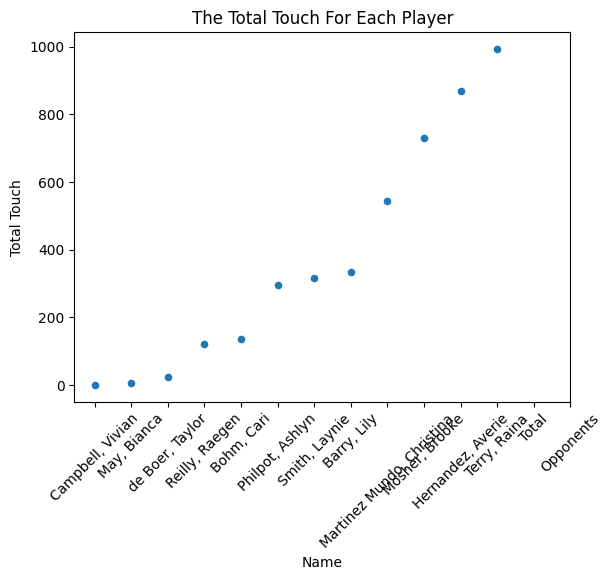

In [1183]:
df_sorted1 = df_clear.sort_values(by = 'Total Touch')
scatter_touch = df_sorted1.plot.scatter(x='Name', y='Total Touch')
scatter_touch.set_xticks(df['Name'])
scatter_touch.set_xticklabels(scatter_touch.get_xticklabels(), rotation=45)
scatter_touch.set_title('The Total Touch For Each Player')


It's much more clear. The plot provides a view of which player engaged more actively in the game. The first 7 players, from Terry to Philpot, are starters. The rest players are substitutes. However, there isn't a clear division line of who played more. 

When I go to the individual's bio to confirm my result, I found liberos can serve in games in Big Ten Games! This rule is different from the official international volleyball rules! So, I realize the total number of service can also be a standard to measure if the player is a starter. 

Text(0.5, 1.0, 'The Total Serve For Each Player')

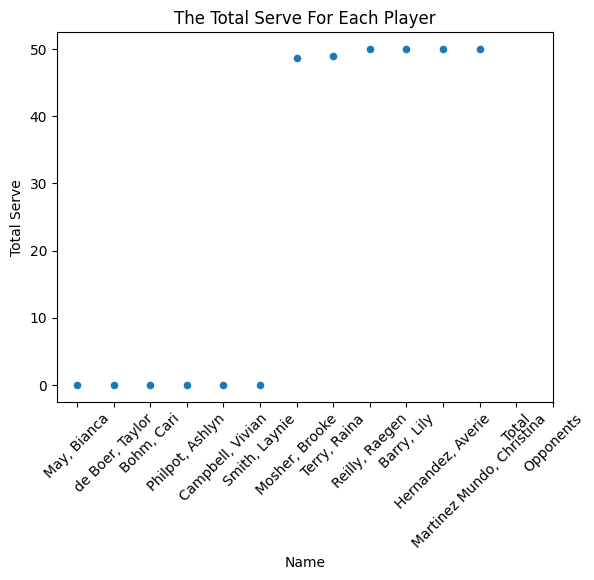

In [1184]:
df_sorted = df_clear.sort_values(by = 'Total Serve')
scatter_serve = df_sorted.plot.scatter(x='Name', y='Total Serve')
scatter_serve.set_xticks(df['Name'])
scatter_serve.set_xticklabels(scatter_serve.get_xticklabels(), rotation=45)
scatter_serve.set_title('The Total Serve For Each Player')


At this point, the division line shows up clearly! I can select the starters now.

In [1185]:
df_starter1 = df_sorted[df_sorted["Total Serve"] > 40]
df_starter1


,Name,Sets Played,Matches Played,Matches Started,Points,Points per Set,Kills,Kills per Set,Errors,Attacking Total Attempts,...,Reception Percentage,Reception Errors per Set,Block Solos,Block Assists,Total Blocks,Blocks per Set,Blocking Errors,Ball Handling Errors,Total Serve,Total Touch
9,"Mosher, Brooke",49,14,14.0,64.5,1.32,34,0.69,20,121,...,1.000,0.00,3,17,20,0.41,3,1,48.717949,730.717949
6,"Terry, Raina",49,14,14.0,255.0,5.20,209,4.27,100,572,...,0.924,0.37,5,32,37,0.76,4,0,49.019608,993.019608
0,"Reilly, Raegen",47,14,0.0,3.0,0.06,0,0.00,0,1,...,0.000,0.00,0,0,0,0.00,1,0,50.000000,120.000000
1,"Barry, Lily",49,14,0.0,11.0,0.22,0,0.00,0,3,...,0.890,0.39,0,0,0,0.00,0,0,50.000000,333.000000
4,"Hernandez, Averie",49,14,14.0,143.5,2.93,127,2.59,44,410,...,0.904,0.59,0,15,15,0.31,0,1,50.000000,868.000000
11,"Martinez Mundo, Christina",49,14,0.0,10.0,0.20,1,0.02,1,6,...,0.933,0.35,0,0,0,0.00,0,0,50.000000,545.000000


In [1186]:
df_starter2 = df_sorted1[df_sorted1["Total Touch"] > 250]
df_starter2


,Name,Sets Played,Matches Played,Matches Started,Points,Points per Set,Kills,Kills per Set,Errors,Attacking Total Attempts,...,Reception Percentage,Reception Errors per Set,Block Solos,Block Assists,Total Blocks,Blocks per Set,Blocking Errors,Ball Handling Errors,Total Serve,Total Touch
7,"Philpot, Ashlyn",49,14,14.0,146.5,2.99,117,2.39,32,225,...,1.000,0.00,6,47,53,1.08,2,0,0.000000,296.000000
10,"Smith, Laynie",49,14,14.0,119.5,2.44,101,2.06,47,260,...,0.000,0.00,2,33,35,0.71,6,0,0.000000,315.000000
1,"Barry, Lily",49,14,0.0,11.0,0.22,0,0.00,0,3,...,0.890,0.39,0,0,0,0.00,0,0,50.000000,333.000000
11,"Martinez Mundo, Christina",49,14,0.0,10.0,0.20,1,0.02,1,6,...,0.933,0.35,0,0,0,0.00,0,0,50.000000,545.000000
9,"Mosher, Brooke",49,14,14.0,64.5,1.32,34,0.69,20,121,...,1.000,0.00,3,17,20,0.41,3,1,48.717949,730.717949
4,"Hernandez, Averie",49,14,14.0,143.5,2.93,127,2.59,44,410,...,0.904,0.59,0,15,15,0.31,0,1,50.000000,868.000000
6,"Terry, Raina",49,14,14.0,255.0,5.20,209,4.27,100,572,...,0.924,0.37,5,32,37,0.76,4,0,49.019608,993.019608


We can see slight difference between the starters we find out from the two metrics. In this project, I'll choose the one that involves more players. Because I only want to rule out more extreme values, as long as the player engage to the game to some degree, she can be counted

In [1187]:
df_starter = df_starter2
# df_starter

In [1188]:
df_substitute = df_clear[~df_clear["Name"].isin(df_starter.Name)]
df_substitute

,Name,Sets Played,Matches Played,Matches Started,Points,Points per Set,Kills,Kills per Set,Errors,Attacking Total Attempts,...,Reception Percentage,Reception Errors per Set,Block Solos,Block Assists,Total Blocks,Blocks per Set,Blocking Errors,Ball Handling Errors,Total Serve,Total Touch
0,"Reilly, Raegen",47,14,0.0,3.0,0.06,0,0.00,0,1,...,0.0,0.00,0,0,0,0.00,1,0,50.0,120.0
2,"May, Bianca",11,4,0.0,0.0,0.00,0,0.00,0,0,...,0.0,0.00,0,0,0,0.00,0,0,0.0,5.0
3,"de Boer, Taylor",7,4,0.0,4.5,0.64,4,0.57,4,21,...,0.0,0.00,0,1,1,0.14,0,0,0.0,23.0
5,"Bohm, Cari",49,14,14.0,65.5,1.34,34,0.69,10,72,...,0.0,0.02,7,49,56,1.14,4,0,0.0,136.0
8,"Campbell, Vivian",1,1,0.0,0.0,0.00,0,0.00,0,0,...,0.0,0.00,0,0,0,0.00,0,0,0.0,0.0


# Section4: Planning for Part II

The goal for this project is to explore the following aspects:
### 1. Offensive Characteristics: 

Key metrics: 
$$
\text{Attacking Efficiency} =  \frac{\text{kills - errors}} {\text{Attacking Total Attempts}}
$$

$$
\text{Kill Rate} =  \frac{\text{kills}} {\text{Attacking Total Attempts}}
$$

$$
\text{Error Rate} =  \frac{\text{errors}} {\text{Attacking Total Attempts}}
$$


### 2. Defensive Characteristics: 

Key metrics: 

$$
\text{Successful Dig Rate} =  \frac{\text{Reception Total Attempts - Reception Errors + DIG}} {\text{Reception Total Attempts + DIG}}
$$

$$
\text{Reception Error Rate} =  \frac{\text{Reception Errors}} {\text{Reception Total Attempts}}
$$

$$
\text{Effective Block rate} =  \frac{\text{Total Blocks - Blocking Errors}} {\text{Total Blocks}}
$$

I'll draw the bar chart for every player and see how they perform in these two aspects.

### 3. Lineup Strategy: Substitution potential

In this part, I want to take a closer look to substitutes. Substitutes are essential when starters get injured or too tired to continue. In these situations, we want substitutes who can minimize errors and at least maintain the game without making things worse. 

At the same time, if a coach wants to try out a new lineup, they’ll need to know which specific skills each player is particularly strong at compared to their usual performance. This helps identify their potential and how they can contribute best to the team.


# Section5: Data Science:

I'll dig into the three questions I raised in section 4. I'll analyse the first two questions together by using Pandas library in python and use random forest to find the way to evaluate substitutes' potential.



## Step 5.1 Using specific metrics to find our offensive and defensive characteristics of our team

In section 4, I have stated the three questions I want to explore. In this part, I'll first explore the offensive and defensive characteristics for the team. I'll construct a new dataset including the necessary metrics. Then, calculate the mean of the metrics to represent the team's overall performances.

In the later section (section 6), I'll draw all the key stats for each player. In this way, we can see more details about the team, which may also provides insights into their performance strengths and areas for improvement.

### Step 5.1.1 create the new dataset
Here is the dataset of this part, with more metrics. I'll use `df_starter`, since starters play more in the game, which can represent the team more accurately.

In [1189]:
df_starter = df_starter.copy()
df_starter["Attacking Efficiency"] = (df_starter.Kills - df_starter["Errors "]) / df_starter["Attacking Total Attempts"]
df_starter["Kill Rate"] = (df_starter.Kills) / df_starter["Attacking Total Attempts"]
df_starter["Error Rate"] = (df_starter["Errors "]) / df_starter["Attacking Total Attempts"]
df_starter["Successful Dig Rate"] = (df_starter["Reception Total Attempts"] - df_starter["Reception Errors"] + df_starter['DIG']) / (df_starter["Reception Total Attempts"] + df_starter["DIG"])
df_starter["Reception Error Rate"] = (df_starter["Reception Errors"]) / df_starter["Reception Total Attempts"]
df_starter["Effective Block rate"] = (df_starter['Total Blocks'] - df_starter['Blocking Errors']) / df_starter['Total Blocks']
df_starter = df_starter.fillna(0)
df_starter


,Name,Sets Played,Matches Played,Matches Started,Points,Points per Set,Kills,Kills per Set,Errors,Attacking Total Attempts,...,Blocking Errors,Ball Handling Errors,Total Serve,Total Touch,Attacking Efficiency,Kill Rate,Error Rate,Successful Dig Rate,Reception Error Rate,Effective Block rate
7,"Philpot, Ashlyn",49,14,14.0,146.5,2.99,117,2.39,32,225,...,2,0,0.000000,296.000000,0.377778,0.520000,0.142222,1.000000,0.000000,0.962264
10,"Smith, Laynie",49,14,14.0,119.5,2.44,101,2.06,47,260,...,6,0,0.000000,315.000000,0.207692,0.388462,0.180769,1.000000,0.000000,0.828571
1,"Barry, Lily",49,14,0.0,11.0,0.22,0,0.00,0,3,...,0,0,50.000000,333.000000,0.000000,0.000000,0.000000,0.929630,0.109827,0.000000
11,"Martinez Mundo, Christina",49,14,0.0,10.0,0.20,1,0.02,1,6,...,0,0,50.000000,545.000000,0.000000,0.166667,0.166667,0.961451,0.066667,0.000000
9,"Mosher, Brooke",49,14,14.0,64.5,1.32,34,0.69,20,121,...,3,1,48.717949,730.717949,0.115702,0.280992,0.165289,1.000000,0.000000,0.850000
4,"Hernandez, Averie",49,14,14.0,143.5,2.93,127,2.59,44,410,...,0,1,50.000000,868.000000,0.202439,0.309756,0.107317,0.923684,0.096026,1.000000
6,"Terry, Raina",49,14,14.0,255.0,5.20,209,4.27,100,572,...,4,0,49.019608,993.019608,0.190559,0.365385,0.174825,0.944785,0.076271,0.891892


### Step 5.1.2 Compute the mean
Now, get the stats of those newly added metrics

In [1190]:
Attacking_Efficiency_mean = df_starter["Attacking Efficiency"].mean()
Attacking_Efficiency_mean

np.float64(0.15631014710837327)

In [1191]:
Kill_Rate_mean = df_starter["Kill Rate"].mean()
Kill_Rate_mean

np.float64(0.29018009337299805)

In [1192]:
Error_Rate_mean = df_starter["Error Rate"].mean()
Error_Rate_mean

np.float64(0.13386994626462476)

In [1193]:
Successful_Dig_Rate_mean = df_starter["Successful Dig Rate"].mean()
Successful_Dig_Rate_mean

np.float64(0.9656500519135854)

In [1194]:
Reception_Error_Rate_mean = df_starter['Reception Error Rate'].mean()
Reception_Error_Rate_mean

np.float64(0.04982727610984936)

In [1195]:
block_rate = df_starter[df_starter['Name'] != 'Reilly, Raegen']['Effective Block rate'].mean()
block_rate

np.float64(0.6475324959152452)

### Step 5.1.3 Partial summarization
The brief conclusions derived from this part:

1. Offensive characteristic: Generally, for college-level players in the United States, a good kill percentage for outside hitters ranges between 0.25 to 0.3, with anything above 30% considered excellent. For us, we have an average kill rate of 0.29, which is relatively high. However, an average attacking efficiency generally ranges between 0.20 to 0.25. We only got a 0.15, which is a low score. Since the error rate is usually used by coach to make instant decisions on court, there is no particular standard for an hitting error rate. Combining the two results of kill rate and attacking efficiency, we can conclude we have a high attacking ability but low stability (caused by high error rate).

2. Defensive Characteristic: our Dig rate is exceptionally high, and our average block rate exceeded to 0.5. These metrics show our defense is very good, which increases the ball control to our team. When facing difficulties, we will have the confidence to face that, but not be threatened by increasing error rate in all aspects including attacking due to pressure.


The compared average data is observed from many public sources, including:  https://www.ncaa.com/stats/volleyball-women/d1/current/team/46 , https://goldmedalsquared.com/post/is-hitting-percentage-the-best-stat-to-rank-attackers/ , https://volleyballvantage.com/what-are-good-volleyball-stats/ and so on.


## Step 5.2 Substitute Potential Evaluation

In this part, I will utilize a Random Forest model to determine which player's performances (specific stats/ metrics) are most significant for the overall team performance.

1. Assess Potential Scores for Each Player: I will create the potential score for each player based on their total touches. Here, I'll use the total touches they played in the game as the potential score directly. A player plays more is more likely to be a starter and will receive a higher score.

2. Analyze Skill Impact: Using Random Forest, I will evaluate how each skill contributes to the overall score, identifying the relative importance of different performance metrics.
 

### Step 5.2.1 Assess Potential Scores

Here, I'll train the model to find the metrics influence the potential score

To get everything prepared, import all the libraries we need.

In [1196]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Let's create a new data frame with the variables that we need most. All the stats I leave here are what make the play to positively contribute to the team.

In [1197]:
df_evaluate = df_starter.copy()[["Total Touch", "Kills", "Set Assists", "Service Aces", "DIG", "Reception Total Attempts", "Block Solos ", "Block Assists"]]
df_evaluate.rename(columns={'Total Touch': 'Potential'}, inplace=True)
df_evaluate


,Potential,Kills,Set Assists,Service Aces,DIG,Reception Total Attempts,Block Solos,Block Assists
7,296.000000,117,2,0,8,8,6,47
10,315.000000,101,3,0,17,0,2,33
1,333.000000,0,10,11,97,173,0,0
11,545.000000,1,48,9,186,255,0,0
9,730.717949,34,434,19,105,2,3,17
4,868.000000,127,13,9,78,302,0,15
6,993.019608,209,9,25,90,236,5,32


### Step 5.3.2 Analyze Skill Impact: Use random forest



In [1198]:
# define the variables
X = df_evaluate.drop('Potential', axis=1)
y = df_evaluate['Potential']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# initialization
rf = RandomForestRegressor(
    n_estimators=1000,      
    random_state=42,       
    n_jobs=-1             
)

# train the model
rf.fit(X_train, y_train)

# get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# visualize
feature_importances = pd.DataFrame({
    'Stats': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                      Stats  Importance
0                     Kills    0.308893
1               Set Assists    0.159692
4  Reception Total Attempts    0.119058
6             Block Assists    0.112631
3                       DIG    0.109670
2              Service Aces    0.105756
5              Block Solos     0.084301


### Step 5.3.3 Summarization

With the weight of each skills in the potential score we analyzed, we can see Kills, Set Assists, Reception Total Attempts are three aspects that matters more in the game. This indicates, besides the killing rate, the connection skills are more significant to measure the overall value to the on-court game. Thus, the substitute with high kill rate and low reception and reception error rate should be considered prior.

In [1199]:
df_substitute = df_substitute.copy()
df_substitute["Attacking Efficiency"] = (df_substitute.Kills - df_substitute["Errors "]) / df_substitute["Attacking Total Attempts"]
df_substitute["Kill Rate"] = (df_substitute.Kills) / df_substitute["Attacking Total Attempts"]
df_substitute["Error Rate"] = (df_substitute["Errors "]) / df_substitute["Attacking Total Attempts"]
df_substitute["Successful Dig Rate"] = (df_substitute["Reception Total Attempts"] - df_substitute["Reception Errors"] + df_substitute.DIG) / (df_substitute["Reception Total Attempts"] + df_substitute["DIG"])
df_substitute["Reception Error Rate"] = (df_substitute["Reception Errors"]) / df_substitute["Reception Total Attempts"]
df_substitute["Effective Block rate"] = (df_substitute['Total Blocks'] - df_substitute['Blocking Errors']) / df_substitute['Total Blocks']
df_substitute = df_substitute.fillna(0)
df_substitute

,Name,Sets Played,Matches Played,Matches Started,Points,Points per Set,Kills,Kills per Set,Errors,Attacking Total Attempts,...,Blocking Errors,Ball Handling Errors,Total Serve,Total Touch,Attacking Efficiency,Kill Rate,Error Rate,Successful Dig Rate,Reception Error Rate,Effective Block rate
0,"Reilly, Raegen",47,14,0.0,3.0,0.06,0,0.00,0,1,...,1,0,50.0,120.0,0.000000,0.000000,0.000000,1.0,0.0,-inf
2,"May, Bianca",11,4,0.0,0.0,0.00,0,0.00,0,0,...,0,0,0.0,5.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000
3,"de Boer, Taylor",7,4,0.0,4.5,0.64,4,0.57,4,21,...,0,0,0.0,23.0,0.000000,0.190476,0.190476,0.0,0.0,1.000000
5,"Bohm, Cari",49,14,14.0,65.5,1.34,34,0.69,10,72,...,4,0,0.0,136.0,0.333333,0.472222,0.138889,0.8,1.0,0.928571
8,"Campbell, Vivian",1,1,0.0,0.0,0.00,0,0.00,0,0,...,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000


The substitute with the highest kill rate:

In [1200]:
df_substitute.nlargest(1, 'Kills')

,Name,Sets Played,Matches Played,Matches Started,Points,Points per Set,Kills,Kills per Set,Errors,Attacking Total Attempts,...,Blocking Errors,Ball Handling Errors,Total Serve,Total Touch,Attacking Efficiency,Kill Rate,Error Rate,Successful Dig Rate,Reception Error Rate,Effective Block rate
5,"Bohm, Cari",49,14,14.0,65.5,1.34,34,0.69,10,72,...,4,0,0.0,136.0,0.333333,0.472222,0.138889,0.8,1.0,0.928571


In [1201]:
df_substitute.nlargest(1,'Set Assists')

,Name,Sets Played,Matches Played,Matches Started,Points,Points per Set,Kills,Kills per Set,Errors,Attacking Total Attempts,...,Blocking Errors,Ball Handling Errors,Total Serve,Total Touch,Attacking Efficiency,Kill Rate,Error Rate,Successful Dig Rate,Reception Error Rate,Effective Block rate
0,"Reilly, Raegen",47,14,0.0,3.0,0.06,0,0.0,0,1,...,1,0,50.0,120.0,0.0,0.0,0.0,1.0,0.0,-inf


In [1202]:
df_substitute.nlargest(1,'Reception Total Attempts')

,Name,Sets Played,Matches Played,Matches Started,Points,Points per Set,Kills,Kills per Set,Errors,Attacking Total Attempts,...,Blocking Errors,Ball Handling Errors,Total Serve,Total Touch,Attacking Efficiency,Kill Rate,Error Rate,Successful Dig Rate,Reception Error Rate,Effective Block rate
5,"Bohm, Cari",49,14,14.0,65.5,1.34,34,0.69,10,72,...,4,0,0.0,136.0,0.333333,0.472222,0.138889,0.8,1.0,0.928571


It's amazing to see that Bohm, Cari have the highest stats for two metrics. 

Of course, I'm choosing the players according to their stats for just one season. Substitutes have less on-court opportunities than starters. So, it should be more proper to evaluate them according to their training stats. However, the result of seasonal game stats indeed indicates something.

# Section6: A Different Data Visualization:

Here, I'll construct two plots. 

1. The first one is a bar chart showcasing all players and their performance across various stats. This will provide a general overview of the team’s performance and help us validate any conclusions drawn earlier.

2. The second one is a radar chart that highlights the key skills to consider when evaluating potential substitutes.

## Step 6.1 The general view of our team: bar chart

To get all the stats I need, add the new metrics into our original dataset.

In [1203]:
df_clear["Attacking Efficiency"] = (df_clear.Kills - df_clear["Errors "]) / df_clear["Attacking Total Attempts"]
df_clear["Kill Rate"] = (df_clear.Kills) / df_clear["Attacking Total Attempts"]
df_clear["Error Rate"] = (df_clear["Errors "]) / df_clear["Attacking Total Attempts"]
df_clear["Successful Dig Rate"] = (df_clear["Reception Total Attempts"] - df_clear["Reception Errors"] + df_clear.DIG) / (df_clear["Reception Total Attempts"] + df_starter["DIG"])
df_clear["Reception Error Rate"] = (df_clear["Reception Errors"]) / df_clear["Reception Total Attempts"]
df_clear["Effective Block rate"] = (df_clear['Total Blocks'] - df_clear['Blocking Errors']) / df_clear['Total Blocks']
df_clear = df_clear.fillna(0)
df_clear

,Name,Sets Played,Matches Played,Matches Started,Points,Points per Set,Kills,Kills per Set,Errors,Attacking Total Attempts,...,Blocking Errors,Ball Handling Errors,Total Serve,Total Touch,Attacking Efficiency,Kill Rate,Error Rate,Successful Dig Rate,Reception Error Rate,Effective Block rate
0,"Reilly, Raegen",47,14,0.0,3.0,0.06,0,0.00,0,1,...,1,0,50.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf
1,"Barry, Lily",49,14,0.0,11.0,0.22,0,0.00,0,3,...,0,0,50.000000,333.000000,0.000000,0.000000,0.000000,0.929630,0.109827,0.000000
2,"May, Bianca",11,4,0.0,0.0,0.00,0,0.00,0,0,...,0,0,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"de Boer, Taylor",7,4,0.0,4.5,0.64,4,0.57,4,21,...,0,0,0.000000,23.000000,0.000000,0.190476,0.190476,0.000000,0.000000,1.000000
4,"Hernandez, Averie",49,14,14.0,143.5,2.93,127,2.59,44,410,...,0,1,50.000000,868.000000,0.202439,0.309756,0.107317,0.923684,0.096026,1.000000
5,"Bohm, Cari",49,14,14.0,65.5,1.34,34,0.69,10,72,...,4,0,0.000000,136.000000,0.333333,0.472222,0.138889,0.000000,1.000000,0.928571
6,"Terry, Raina",49,14,14.0,255.0,5.20,209,4.27,100,572,...,4,0,49.019608,993.019608,0.190559,0.365385,0.174825,0.944785,0.076271,0.891892
7,"Philpot, Ashlyn",49,14,14.0,146.5,2.99,117,2.39,32,225,...,2,0,0.000000,296.000000,0.377778,0.520000,0.142222,1.000000,0.000000,0.962264
8,"Campbell, Vivian",1,1,0.0,0.0,0.00,0,0.00,0,0,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Mosher, Brooke",49,14,14.0,64.5,1.32,34,0.69,20,121,...,3,1,48.717949,730.717949,0.115702,0.280992,0.165289,1.000000,0.000000,0.850000


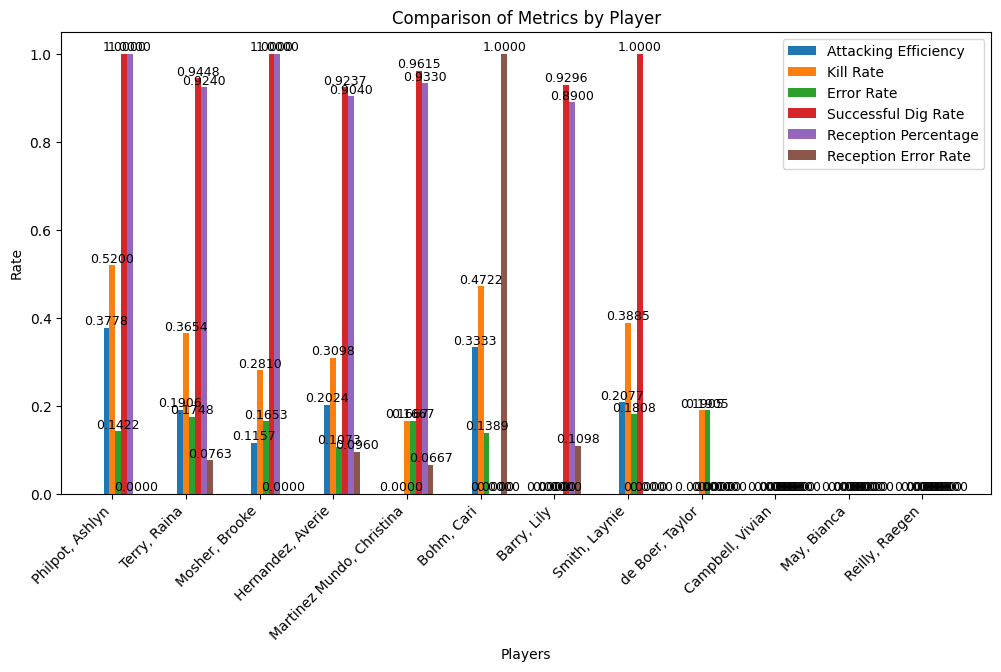

In [1204]:
# I want to order the names by their overall stats from high to low, so I calc the average value of each metrics
average_metrics = df_clear[metrics].mean(axis=1)

# give the order of players
sorted_indices = np.argsort(average_metrics)[::-1]  
sorted_names = df_clear.Name.iloc[sorted_indices]
sorted_data = df_clear[metrics].iloc[sorted_indices]

x = np.arange(len(sorted_names))  
width = 0.08
fig, ax = plt.subplots(figsize=(12, 6))

for i, metric in enumerate(metrics):
    bars = ax.bar(x + i * width, sorted_data[metric], width, label=metric)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  
            height,  
            f"{height:.4f}", 
            ha="center", va="bottom", fontsize=9  
        )

ax.set_xlabel("Players")
ax.set_ylabel("Rate")
ax.set_title("Comparison of Metrics by Player")
ax.set_xticks(x + width)
ax.set_xticklabels(sorted_names, rotation=45, ha="right")
ax.legend()

plt.show()

Take a closer to the graph, our previous conclusions are reasonable. Our defensive metrics are consistently strong across nearly all players, core hitters have solid attacking stats, and our error rates (kill) are well-balanced at moderate levels. However, at this stage, I noticed that the division between starters and substitutes in my analysis is flawed, despite carefully selecting one of the two methods for separation. Bohm, Cari is our core middle, making significant contributions to the game. But I didn't count her as a starter using the method of Total Touch to identify the starters. Because of the position, she may not need to serve that much, and because she only plays the three front rotations, her ball touches are naturally fewer than those of others. Thus, my method of identifying the starters should be improved.

## Step 6.2 How do the skills influencing the potential score: radar chart

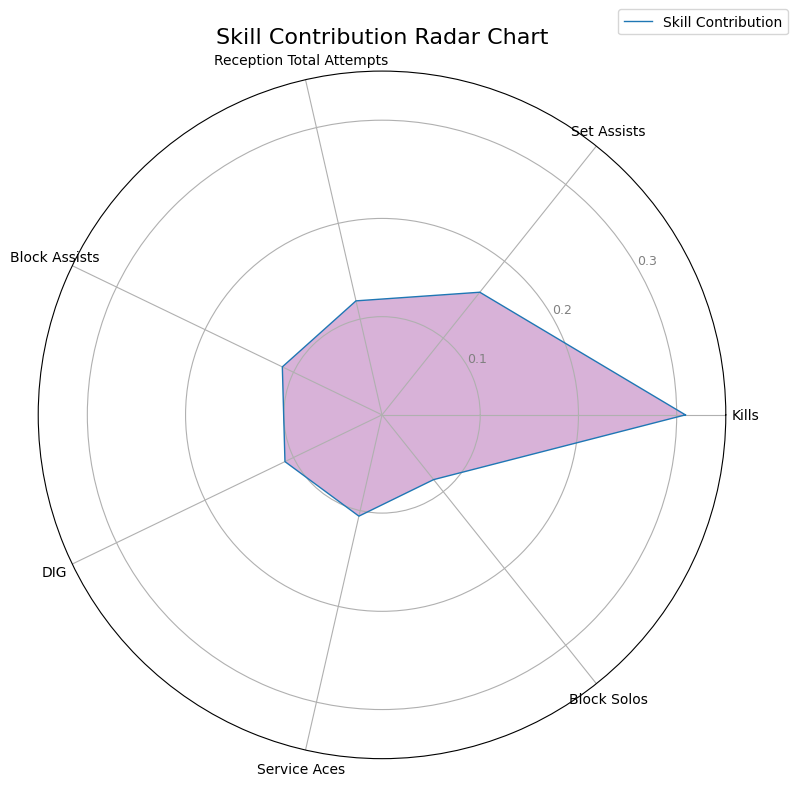

In [1205]:
from math import pi

# prepare the dataframe
data = {'skill': ['Kills', 'Set Assists', 'Reception Total Attempts', 'Block Assists', 'DIG', 'Service Aces', 'Block Solos'],
        'value': [0.308893, 0.159692, 0.119058, 0.112631, 0.109670, 0.105756, 0.084301]} 
df_skills = pd.DataFrame(data)

# number of variables
categories = list(df_skills['skill'])
N = len(categories)

# axis angle
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# initialization
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot data
values = df_skills['value'].tolist()
values += values[:1]  # Close the radar chart
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Skill Contribution")
ax.fill(angles, values, 'purple', alpha=0.3)

# add labels, title, and legend
plt.xticks(angles[:-1], categories, color='black', fontsize=10)
plt.yticks([0.1, 0.2, 0.3], ['0.1', '0.2', '0.3'], color="gray", size=9)
plt.ylim(0, 0.35)
ax.set_title("Skill Contribution Radar Chart", size=16, pad=20)
ax.set_rlabel_position(30)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))


plt.tight_layout()
plt.show()             


The radar chart shows kills weight exceptionally high in the potential score, which can be a special metrics for coaches to look at when evaluating the players. Other metrics have slightly different weight in the score. Just block solo shows a relatively lower weight in the potential.

# Section7: Overall Summary:

In this project, I focused on evaluating the offensive and defensive characteristics of a volleyball team using key performance metrics and provided some suggestions in enhancing lineup strategies by reevaluate the substitutes. 

From the offensive perspective, by analyzing `df_starter` datasets, I found the team's Kill Rate averaged 0.29, which is competitive for the ideal range for college-level players in the United States, typically between 0.25 to 0.3. Our Attacking Efficiency mean at 0.156 and Error Rate at 0.0659 indicated a high attacking capability but low stability due to the moderate error rate, suggesting room for strategic adjustments in player training and game execution. Defensively, our team exhibited strong capabilities with a Successful Dig Rate mean of 0.96 and an Effective Block Rate approaching 0.5, showing strong defense mechanisms that enhance ball control and team confidence under pressure. 

To do a better evaluation on substitutes, I assessed individual players' impact on overall team performance by utilizing a Random Forest model on `df_evaluate`. The analysis highlighted Kills, Set Assists, Reception Total Attempts as the most influential skills, directing future training to bolster these areas further. Surprisingly, traditional metrics like Service Aces held less predictive power on the potential score, prompting a reevaluation of substitutes roles and game strategy.

This project provides data-driven insights that could be help to refine our volleyball team's training programs and match strategies, aiming to optimize performance where it was most needed. 